In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("vertebrate.csv", header='infer')

In [3]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [4]:
data['Class']=data['Class'].replace(['reptiles','fishes','amphibians','birds'],'non-mammals')

In [5]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [6]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [7]:
from sklearn import tree

In [8]:
y=data['Class']

In [9]:
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [10]:
X=data.drop(['Name','Class'], axis=1)

In [11]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [12]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [13]:
clf # initialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
clf=clf.fit(X,y)

In [15]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
import pydotplus

In [17]:
from IPython.display import Image

In [18]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['mammals','non-mammals'],
                              filled=True,out_file=None)

In [19]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mammals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mammals", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [20]:
graph=pydotplus.graph_from_dot_data(dot_data)

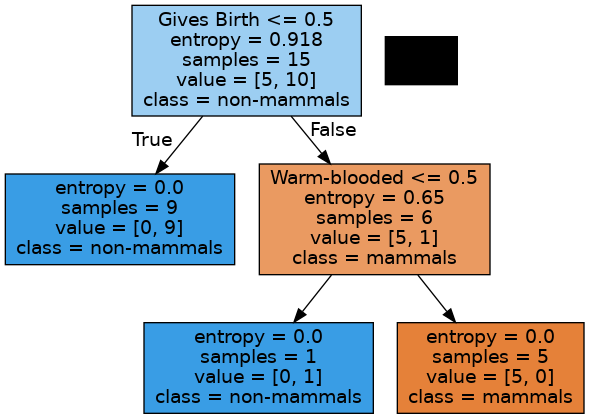

In [21]:
graph


Image(graph.create_png())


In [22]:
testData=[['gila monister',0,0,0,0,1,1,'non-mammals'],
          ['platypus', 1,0,0,0,1,1,'mammals'],
          ['owl', 1,0,0,1,1,0,'non-mammals'],
          ['dolphin',1,1,1,0,0,0,'mammals']]

In [23]:
testData

[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [24]:
testData=pd.DataFrame(testData, columns=data.columns)

In [25]:
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [26]:
testY=testData['Class']

In [27]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [28]:
testX=testData.drop(['Name','Class'], axis=1)

In [29]:
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [30]:
predY=clf.predict(testX)

In [31]:
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [32]:
3/4*100

75.0

In [33]:
predictions=pd.concat([testData['Name'], testData['Class'],pd.Series(predY, name='Predicted Class')], axis=1)

In [34]:
predictions

,Name,Class,Predicted Class
0,gila monister,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


In [35]:
3/4*100

75.0

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(testY, predY)

0.75

In [38]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


Model Overfitting

In [39]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [40]:
maxDepths

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [41]:
import numpy as np


In [42]:
trainAcc=np.zeros(len(maxDepths))

In [43]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
testAcc=np.zeros(len(maxDepths))

In [45]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
index =0
for depth in maxDepths:
  clf=tree.DecisionTreeClassifier(max_depth=depth)
  print(depth)
  clf=clf.fit(X,y)
  Y_predTrain=clf.predict(X)
  Y_predTest=clf.predict(testX)
  trainAcc[index]=accuracy_score(y, Y_predTrain)# training data
  testAcc[index]=accuracy_score(testY, Y_predTest) # test data
  index +=1


2
3
4
5
6
7
8
9
10
15
20
25
30
35
40
45
50


In [47]:
trainAcc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
testAcc

array([0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75])

In [49]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Accuracy')

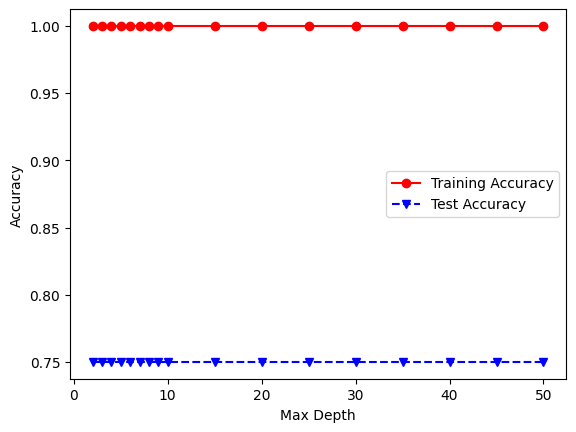

In [50]:
plt.plot(maxDepths, trainAcc,'ro-', maxDepths,testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')


There seems to be no difference that the depths are making. But that can be the case because the dataset is too small